## Exploracion de datasets

In [39]:
import pandas as pd
import geopandas as gpd

import sys
sys.path.append("./modules/") 

from mapbox_tools import df_to_geojson

## Cargar datos

In [106]:
by_col = ['dpto_merger_str']
# by_col = ['dpto_merger_str', 'circuito']

# VOTOS
df_votos = pd.read_csv('./VOTOS_2015_17_'+by_col[-1][:4]+'.csv', header = [0, 1, 2], index_col=list(range(len(by_col) + 1)))
# circuitos
df_circu = gpd.read_file('./circuitos/clean').rename(columns = {'PROV_REF_I': 'PROV_REF_ID', 'dpto_merge': 'dpto_merger_str'})
# por departamentos
df_circu = df_circu.dissolve(by=by_col + ['PROV_REF_ID'])[['geometry']]

In [128]:
df_votos = pd.read_csv('./VOTOS_2015_17_'+by_col[-1][:4]+'.csv', header = [0, 1, 2], index_col=list(range(len(by_col) + 1)))
df_votos.columns = df_votos.columns.swaplevel(0, 1)
df_votos = df_votos['VOTOS'][['DN_2015', 'paso_2017', 'DN_2017']]
df_votos.columns = df_votos.columns.swaplevel(0, 1)
# df_votos.sort_index(axis = 1, level = [0])
df_votos.reindex(, axis = 1)

,Denominacion,ALIANZA FRENTE DE IZQUIERDA Y DE LOS TRABAJADORES,ALIANZA FRENTE PARA LA VICTORIA,ALIANZA UNIDOS POR UNA NUEVA ALTERNATIVA (UNA),CAMBIEMOS,ELECTORES,VOTANTES,VOTOS BLANCOS,1PAIS,CAMBIEMOS,ELECTORES,...,VOTANTES,VOTOS BLANCOS,1PAIS,CAMBIEMOS,ELECTORES,FRENTE DE IZQUIERDA Y DE LOS TRABAJADORES,FRENTE JUSTICIALISTA,UNIDAD CIUDADANA,VOTANTES,VOTOS BLANCOS
,Eleccion,DN_2015,DN_2015,DN_2015,DN_2015,DN_2015,DN_2015,DN_2015,paso_2017,paso_2017,paso_2017,...,paso_2017,paso_2017,DN_2017,DN_2017,DN_2017,DN_2017,DN_2017,DN_2017,DN_2017,DN_2017
dpto_merger_str,PROV_REF_ID,,,,,,,,,,,,,,,,,,,,,
adolfo alsina,2,128.0,2688.0,1156.0,4957.0,13189.0,10543.0,1291.0,1208.0,5164.0,13985.0,...,10253.0,756.0,1135.0,6049.0,14314.0,225.0,616.0,2279.0,11047.0,661.0
adolfo gonzales chaves,2,138.0,3347.0,1035.0,2279.0,10420.0,8846.0,1694.0,1136.0,2427.0,10473.0,...,7164.0,1448.0,856.0,3201.0,10473.0,207.0,237.0,2512.0,8109.0,1245.0
alberti,2,99.0,2701.0,732.0,3009.0,8859.0,7308.0,916.0,586.0,3032.0,9300.0,...,7413.0,544.0,374.0,3491.0,8937.0,122.0,2033.0,925.0,7199.0,458.0
almirante brown,2,16612.0,131299.0,64659.0,82618.0,419609.0,320424.0,24019.0,47377.0,81987.0,429241.0,...,307240.0,13644.0,34571.0,107880.0,443099.0,20320.0,19297.0,144792.0,336973.0,9262.0
avellaneda,2,11284.0,81333.0,38981.0,70034.0,289664.0,219028.0,11228.0,30090.0,69837.0,293788.0,...,212800.0,6283.0,21089.0,86959.0,300157.0,13006.0,8367.0,90167.0,227494.0,4367.0
ayacucho,2,322.0,3688.0,1114.0,5291.0,15595.0,13087.0,2263.0,1631.0,4944.0,17082.0,...,11843.0,1017.0,1369.0,6720.0,17404.0,671.0,890.0,2919.0,13502.0,1059.0
azul,2,1077.0,11517.0,5549.0,12322.0,53978.0,39895.0,5301.0,6228.0,17713.0,56463.0,...,40652.0,2870.0,4663.0,21317.0,56554.0,1559.0,1589.0,11006.0,42299.0,2445.0
bahia blanca,2,10233.0,39360.0,27784.0,74454.0,235463.0,178187.0,17946.0,20886.0,81363.0,244495.0,...,176205.0,8549.0,16326.0,98613.0,252071.0,11466.0,15468.0,38286.0,187940.0,6889.0


In [131]:
df_votos.sum().sort_values(ascending = True)

Denominacion                                       Eleccion 
VOTOS BLANCOS                                      DN_2017        362244.0
FRENTE DE IZQUIERDA Y DE LOS TRABAJADORES          paso_2017      392924.0
VOTOS BLANCOS                                      paso_2017      467742.0
FRENTE JUSTICIALISTA                               DN_2017        481533.0
ALIANZA FRENTE DE IZQUIERDA Y DE LOS TRABAJADORES  DN_2015        496156.0
FRENTE JUSTICIALISTA                               paso_2017      496267.0
FRENTE DE IZQUIERDA Y DE LOS TRABAJADORES          DN_2017        603787.0
VOTOS BLANCOS                                      DN_2015        791167.0
1PAIS                                              DN_2017       1019090.0
                                                   paso_2017     1313074.0
ALIANZA UNIDOS POR UNA NUEVA ALTERNATIVA (UNA)     DN_2015       2090276.0
UNIDAD CIUDADANA                                   paso_2017     3266979.0
ALIANZA FRENTE PARA LA VICTORIA        

In [94]:
# GeoDataFrame
gdf = gpd.GeoDataFrame(pd.concat([df_votos['paso_2017']['VOTOS_pct'], df_circu], axis = 1))

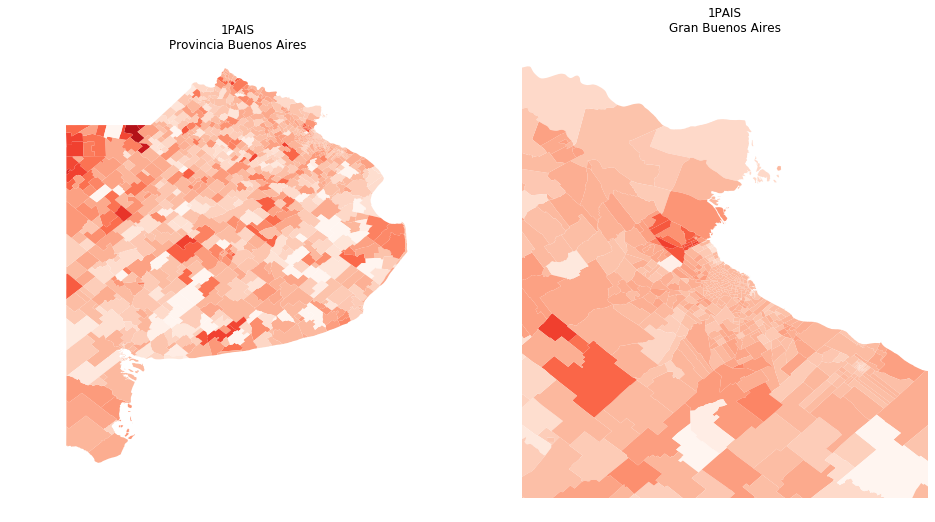

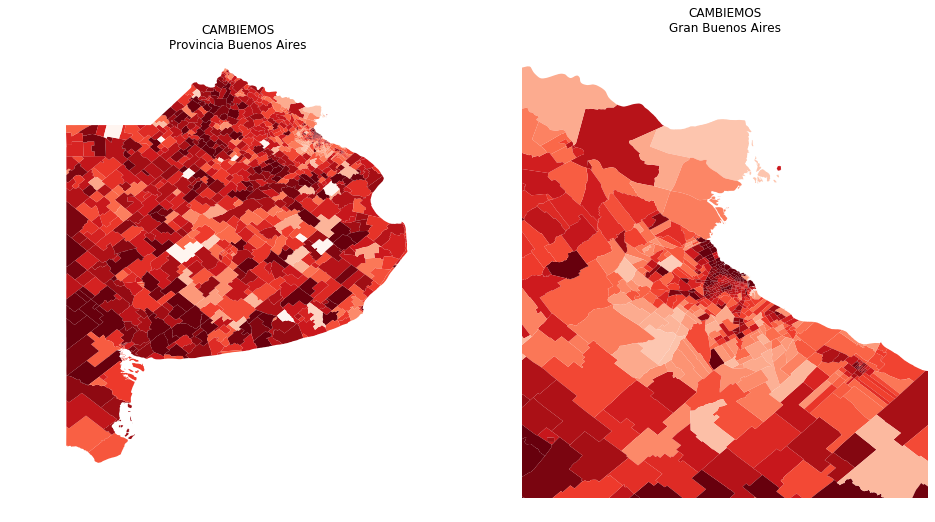

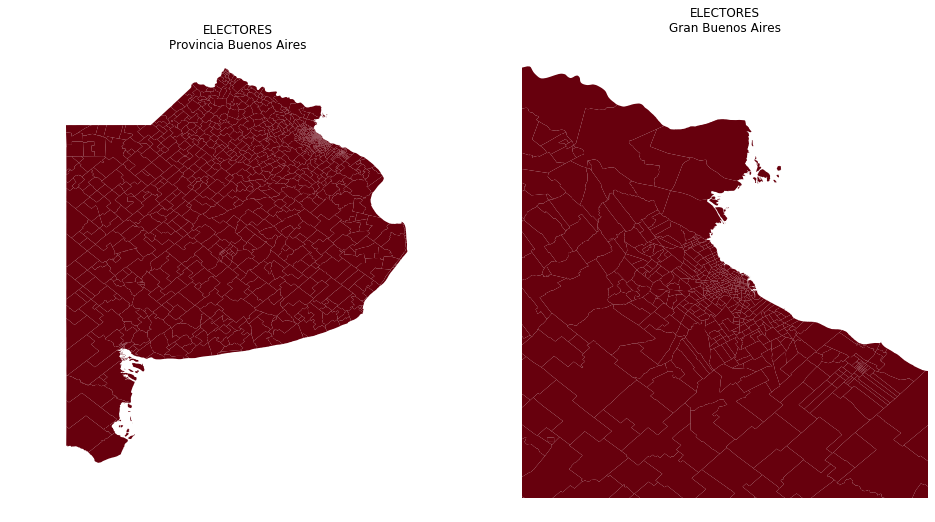

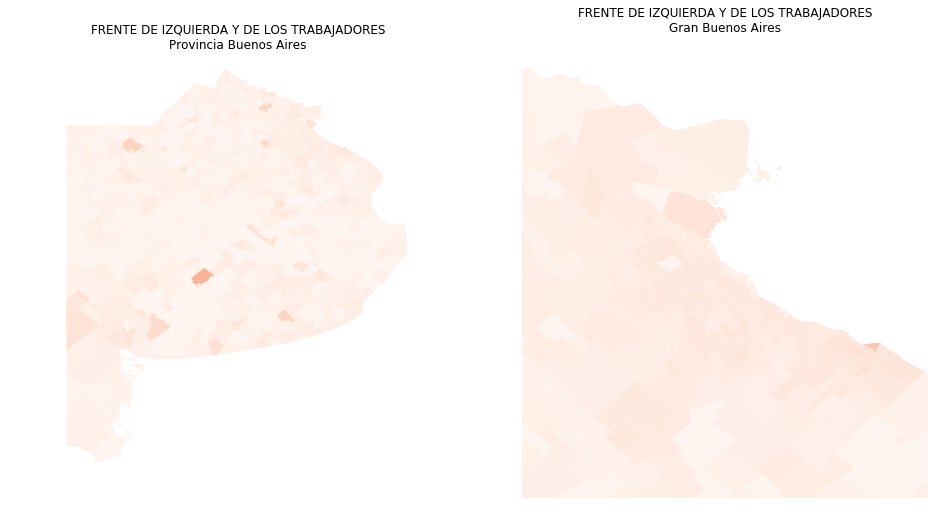

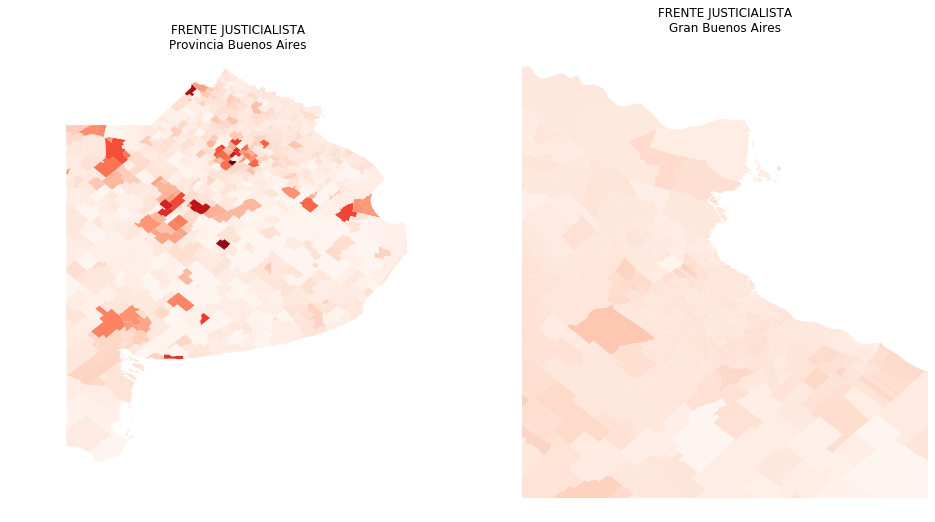

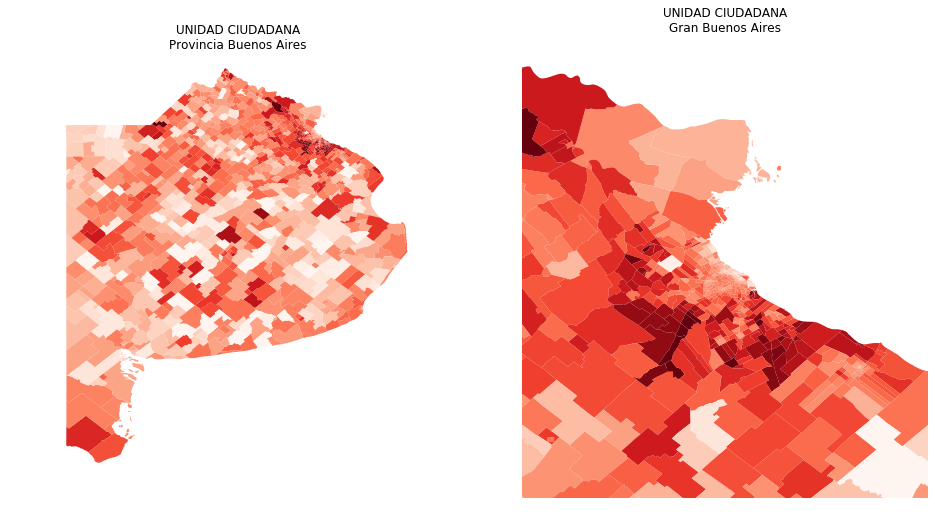

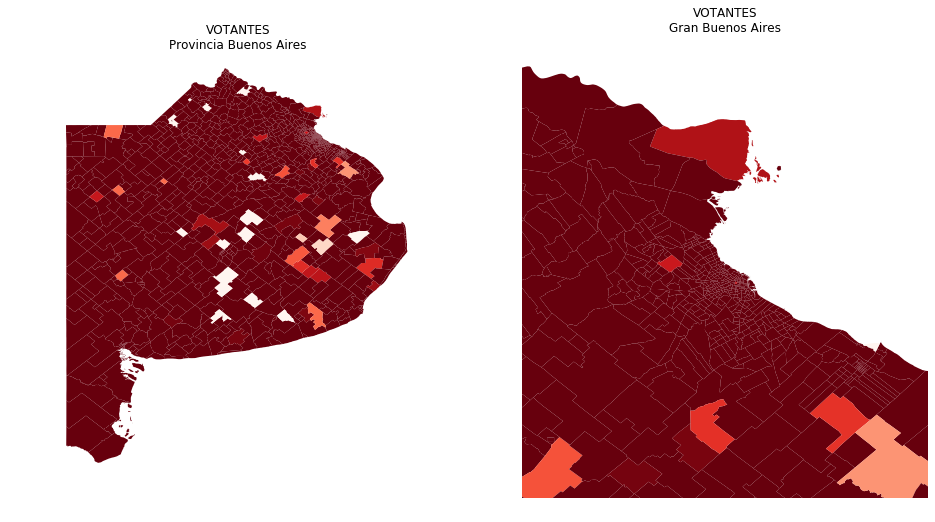

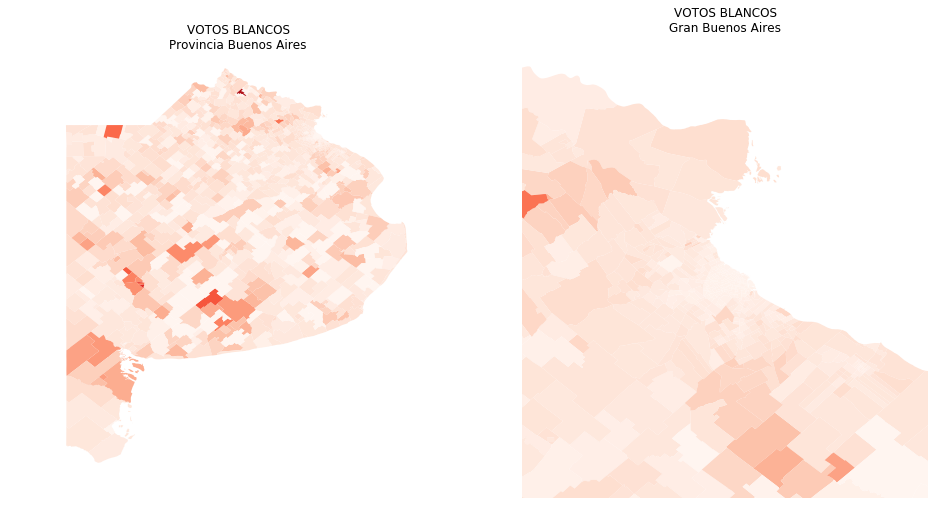

In [99]:
import matplotlib.pyplot as plt
%matplotlib inline

for lista in gdf.columns[:-1]:
    fig, axs = plt.subplots(1, 2, figsize = (16, 12))

    for i in range(2):
        ax = axs[i]
#         full.fillna(0).plot(column = activity, ax = ax, cmap = 'Greens')
        gdf.fillna(gdf.mean()).plot(lista, ax = ax, cmap = 'Reds', vmin = 0, vmax = .4)

        if i == 0: ax.set(xlim = (-64, -56), ylim = (-41.4, -33)); ax.set_title(str(lista)+'\nProvincia Buenos Aires')
        if i == 1: ax.set(xlim = (-59.2, -57.7), ylim = (-35.4, -33.7)); ax.set_title(str(lista)+'\nGran Buenos Aires')

        ax.axis('off')
    plt.show()

In [88]:
polys = df_to_geojson(merged, ['PROVINCIA', 'DEPARTAMENTO', 'CODIGO CIRCUITO', 'mejora_votos_CAMBIEMOS'], 
                      'Polygon','coords')
points = df_to_geojson(merged, ['PROVINCIA', 'DEPARTAMENTO', 'CODIGO CIRCUITO', 'mejora_votos_CAMBIEMOS'], 
                      'Point','centroid')


import json
with open('diff_votos_2015_2017_pts.geojson', 'w') as outfile:
    json.dump(points, outfile)
with open('diff_votos_2015_2017_polys.geojson', 'w') as outfile:
    json.dump(polys, outfile)

In [89]:
from mapbox import Uploader
import os
import unidecode

username = 'matuteiglesias'
token = 'sk.eyJ1IjoibWF0dXRlaWdsZXNpYXMiLCJhIjoiY2puODA4bW8xMGV1dzNrcGtiOGp6NXQ5aCJ9.DohKmjn_o6MK1Y4Q5FG8ew'

service = Uploader(access_token=token)
with open('./diff_votos_2015_2017_pts.geojson', 'r') as src:
    upload_resp = service.upload(src, username+'.'+'diff_votos_15_17_pts')
with open('./diff_votos_2015_2017_polys.geojson', 'r') as src:
    upload_resp = service.upload(src, username+'.'+'diff_votos_15_17_ply')


## Unir circuitos con votos

In [1]:
## Conclusion, definir las siguientes columnas:
import matplotlib.pyplot as plt
%matplotlib inline

# fig, ax = plt.subplots(1, figsize = (15, 20))
# circuitos.sort_values(by = ['circuito']).plot(ax = ax)

# votos_por_circuito['circuito'] = votos_por_circuito['CODIGO CIRCUITO   '].astype(str).str.strip().str.zfill(4)
# votos_por_circuito['distrito'] = votos_por_circuito['CODIGO PROVINCIA'].astype(str).str.zfill(2)

# merged = votos_por_circuito.merge(circuitos[['circuito', 'distrito','geometry']])

#pasar a porcentajes:

# merged['VOTOS_pct'] = merged.groupby(['distrito', 'circuito'])['VOTOS'].apply(lambda x: 100*x/x.sum())


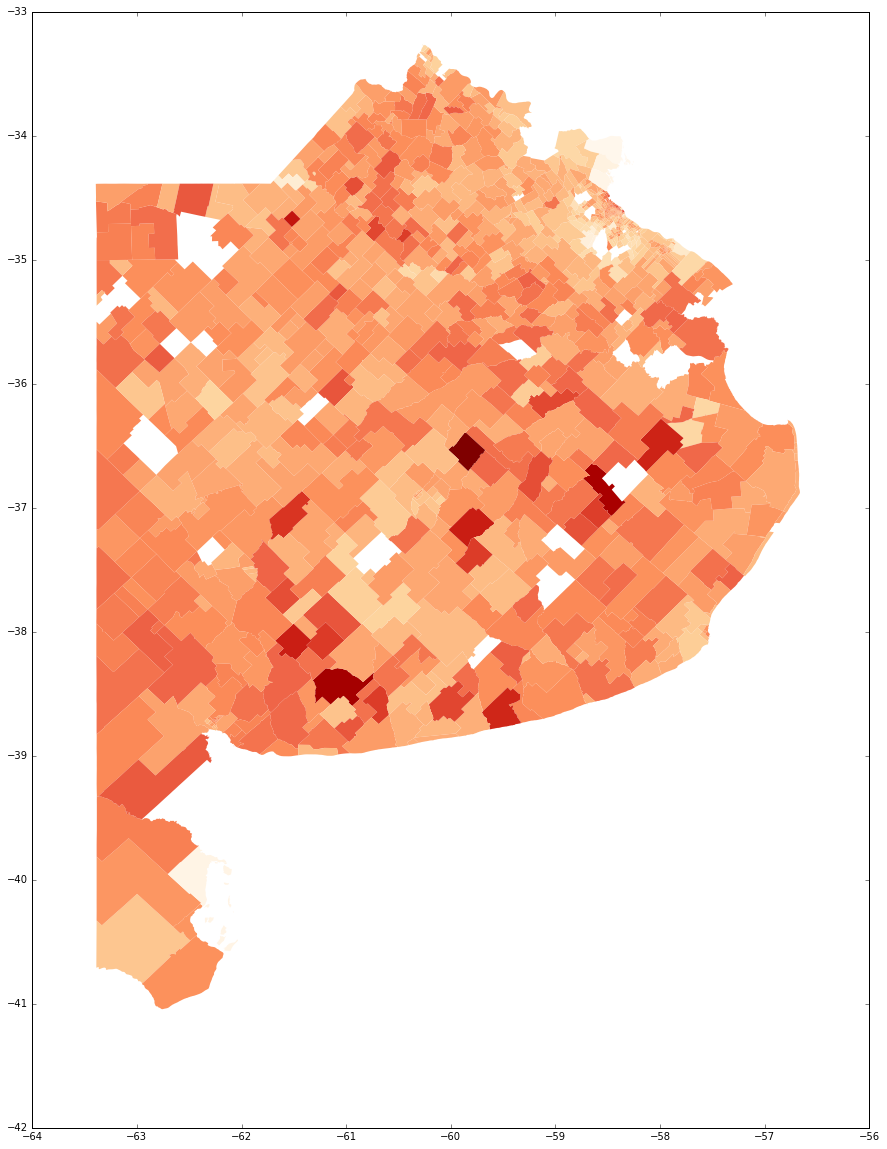

In [213]:
# BA = merged.loc[votos_por_circuito['distrito'].isin(['01', '02'])]

# fig, ax = plt.subplots(1, figsize = (15, 20))
# gpd.GeoDataFrame(BA.loc[BA['CODIGO VOTOS'] == 135]).plot(column='VOTOS_pct', ax = ax, linewidth = 0, cmap='OrRd')

# fig, ax = plt.subplots(1, figsize = (17, 18))
# gpd.GeoDataFrame(BA.loc[BA['CODIGO VOTOS'] == 135]).plot(column='VOTOS_pct', ax = ax, linewidth = 0, cmap='Blues', alpha = .5)
# gpd.GeoDataFrame(BA.loc[BA['CODIGO VOTOS'] == 131]).plot(column='VOTOS_pct', ax = ax, linewidth = 0, cmap='Reds', alpha = .4)
# ax.set_xlim(-59, -57.8)
# ax.set_ylim(-35.2, -34)